In [12]:
# 20
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Загружаем набор данных о вине
data = load_wine()

# Преобразуем данные в DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
target = data.target

# Выберем произвольный числовой признак для масштабирования, например, "alcohol" (это процентное содержание алкоголя)
selected_feature = "alcohol"

# Извлекаем выбранный признак для масштабирования
feature_to_scale = df[[selected_feature]]

# Создаем объект MinMaxScaler
scaler = MinMaxScaler()

# Применяем MinMax-масштабирование к выбранному признаку
scaled_feature = scaler.fit_transform(feature_to_scale)

# Заменяем исходный признак отмасштабированным значением в DataFrame
df.loc[:, selected_feature] = scaled_feature

# Выводим первые несколько строк отмасштабированных данных
print(df.head())

    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0  0.842105        1.71  2.43               15.6      127.0           2.80   
1  0.571053        1.78  2.14               11.2      100.0           2.65   
2  0.560526        2.36  2.67               18.6      101.0           2.80   
3  0.878947        1.95  2.50               16.8      113.0           3.85   
4  0.581579        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0            

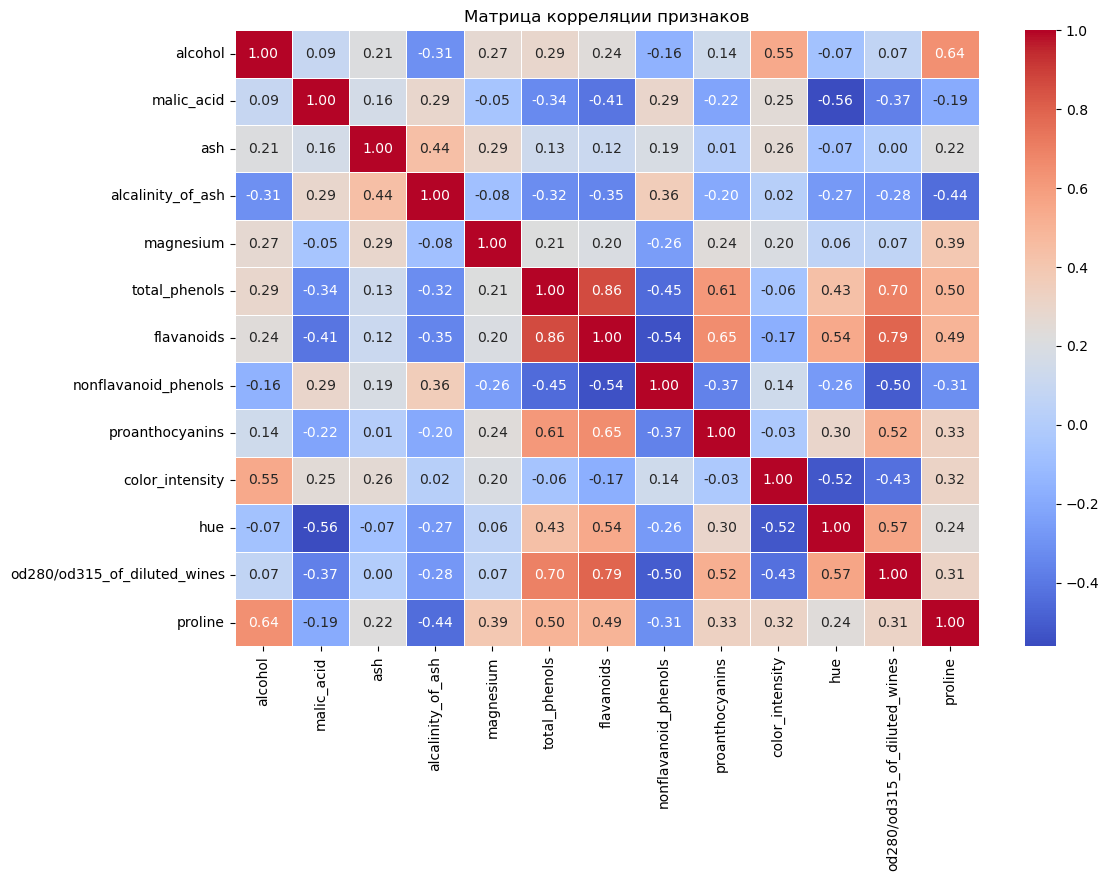

Сильно коррелирующие признаки (по абсолютному значению корреляции > 0.6):
{'proline', 'total_phenols', 'alcohol', 'proanthocyanins', 'flavanoids', 'od280/od315_of_diluted_wines'}


In [1]:
# 40
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка набора данных о вине
data = load_wine()
X = data.data
feature_names = data.feature_names

# Преобразуем данные в DataFrame
df = pd.DataFrame(X, columns=feature_names)

# Вычисление матрицы корреляции
corr_matrix = df.corr()

# Построение тепловой карты корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Матрица корреляции признаков')
plt.show()

# Отбор признаков на основе корреляции
threshold = 0.6  # Порог корреляции для отбора признаков
highly_correlated_features = set()  # Множество для хранения сильно коррелирующих признаков

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            highly_correlated_features.add(colname_i)
            highly_correlated_features.add(colname_j)

# Вывод результатов отбора признаков
print("Сильно коррелирующие признаки (по абсолютному значению корреляции > {}):".format(threshold))
print(highly_correlated_features)


D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


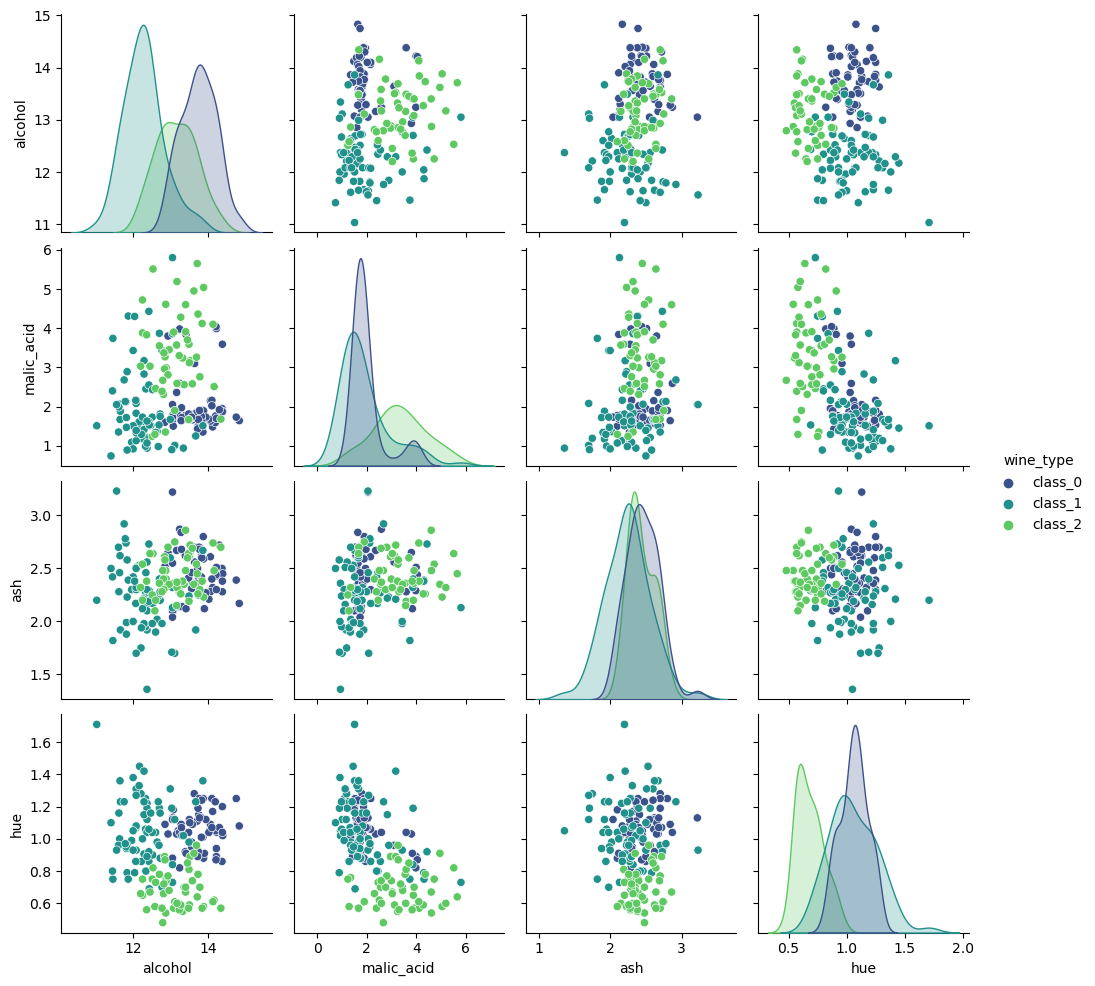

In [11]:
#дополнительная задача 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import pandas as pd

# Загрузка набора данных о вине
wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# Добавление целевой переменной (тип вина) как категориальной метки (hue)
df['target'] = wine_data.target  # Добавление целевой переменной (тип вина) в DataFrame

# Преобразование целевой переменной в названия типов вина для удобства визуализации
target_names = wine_data.target_names
df['wine_type'] = df['target'].map(lambda x: target_names[x])

# Выбор характеристик для анализа парных диаграмм
selected_features = ['alcohol', 'malic_acid', 'ash', 'hue', 'wine_type']

# Создание парных диаграмм с использованием seaborn, с разделением по типу вина
sns.pairplot(df[selected_features], hue='wine_type', palette='viridis')

# Отображение диаграммы
plt.show()
